In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import f1_score, precision_score
from google.colab import files  # Import for uploading files

# To display matplotlib inline in Jupyter/Colab
%matplotlib inline

# Upload the CSV file
uploaded = files.upload()

# After the file is uploaded, load the CSV into a DataFrame
df = pd.read_csv('creditcard.csv')

# Display the first few rows of the dataframe
df.head()


Saving creditcard.csv to creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:

# size of the dataset
df.shape


(284807, 31)

In [3]:
# features info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Distribution of fraudulent and nonfraudulent credit card transactions
df['Class'].value_counts(normalize = True)

,proportion
Class,
0,0.998273
1,0.001727


<Axes: xlabel='Class', ylabel='Amount'>

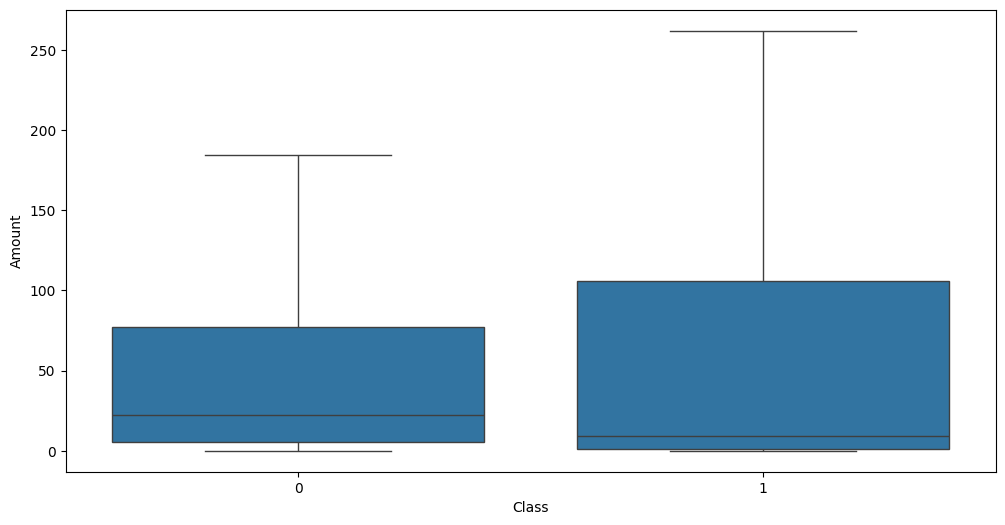

In [5]:
# Analyze the amount feature using the box plot

plt.figure(figsize = (12,6))
sns.boxplot(x = 'Class', y ='Amount', data = df, showfliers = False)

<Axes: >

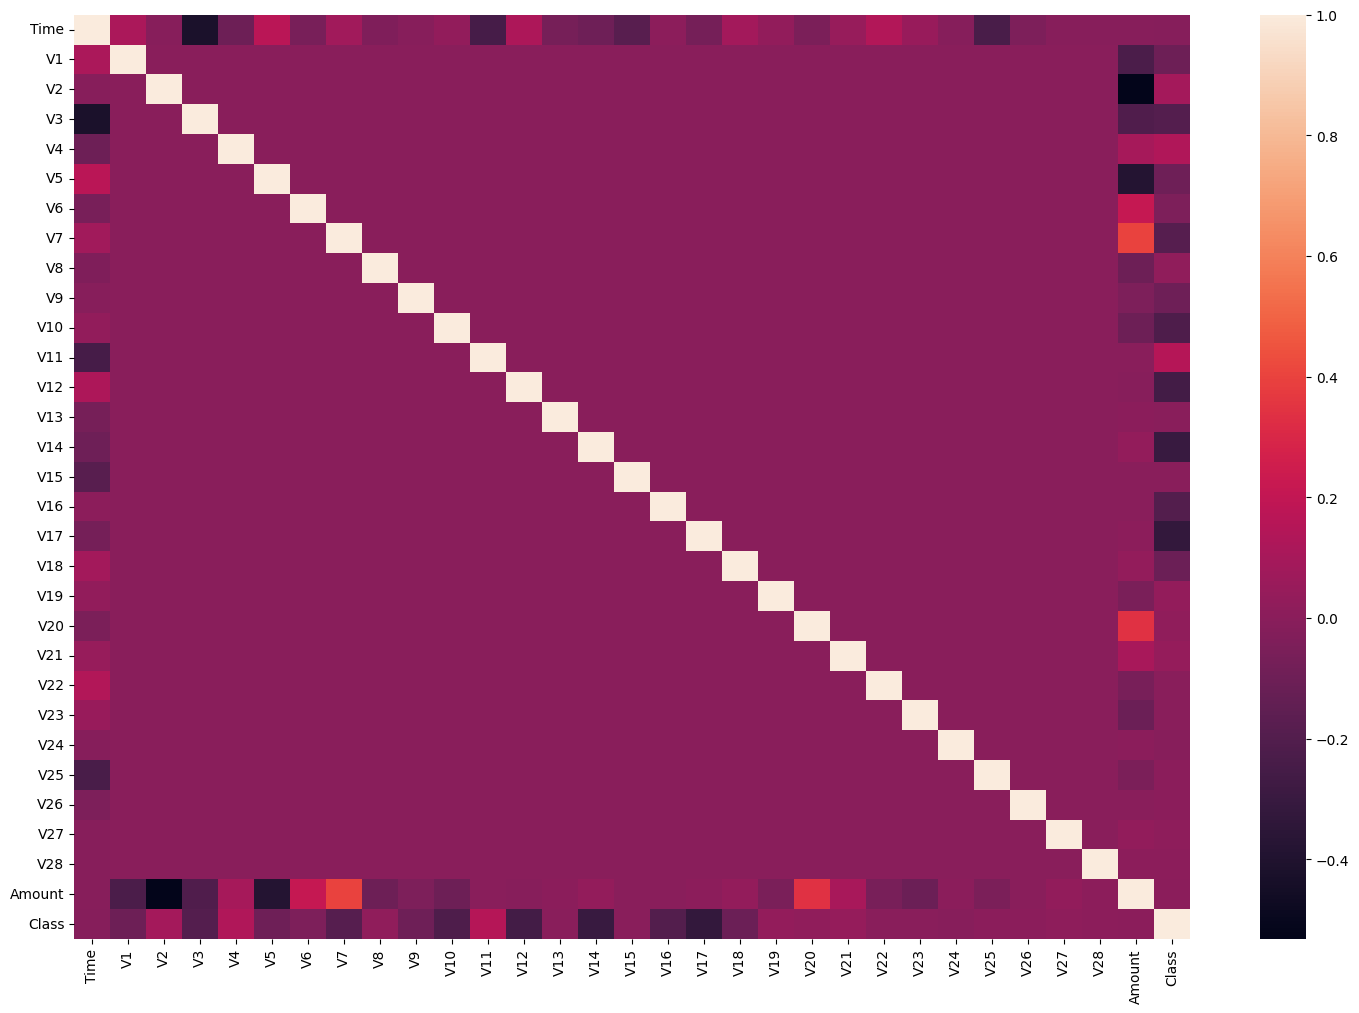

In [6]:
# correlation heatmap
correlations = df.corr()
plt.figure(figsize = (18,12))
sns.heatmap(correlations)

In [7]:
# split data into train and test
feature_cols  = df.columns.tolist()
feature_cols = [i for i in feature_cols if i != 'Class']
x_train, x_test, y_train, y_test = train_test_split(df[feature_cols], df['Class'], test_size = 0.2, random_state = 1234)

In [10]:
# Initialize Random Forest Model
random_forest_classifier = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=1234, n_jobs=-1)

random_forest_classifier.fit(x_train, y_train)

# Prediction and Compute F1 Score and Precision

prediction_values_rf = random_forest_classifier.predict(x_test)
rf_f1 = f1_score(y_test, prediction_values_rf)
rf_precision = precision_score(y_test, prediction_values_rf)
rf_f1, rf_precision

(0.7023809523809523, 0.8428571428571429)

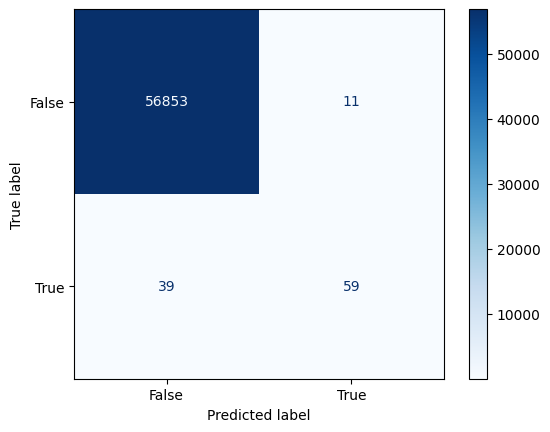

In [11]:
# Plot Confusion Matrix
from sklearn import metrics
confusion_matrix = metrics.confusion_matrix(y_test, random_forest_classifier.predict(x_test))

confusion_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

confusion_matrix_display.plot(cmap = "Blues", values_format='')

plt.show()